# Summary plots for the band 7 data with multiple data set

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import math

def map_series_by_dict(a, d):

    v = np.array(list(d.values()))
    k = np.array(list(d.keys()))
    sidx = k.argsort()
    out_ar = v[sidx[np.searchsorted(k,a,sorter=sidx)]]
    return out_ar

def normalize_array(array, iants, obs_type, normScans=[0,0,0]):

    array_norm = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for i, obs in enumerate(obsType_uq):
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_sub = array[indices]
            array_norm[indices] = array_sub / array_sub[normScans[i]]

    return array_norm

def extrapolate_array(array, array_norm, iants, obs_type):

    array_ext = np.full(np.shape(array), fill_value=np.nan)
    iants_uq = np.unique(iants)
    obsType_uq = np.unique(obs_type)
    for iant in iants_uq:
        for obs in obsType_uq:
            conditions = ((iants == iant) & (obs_type==obs))
            indices = np.where(conditions)
            array_start = array[indices][0]
            array_norm_sub = array_norm[indices]
            array_ext[indices] = array_start * array_norm_sub

    return array_ext

def select_array(array, iants, ATM_ids):
    iants_uq = np.unique(iants)
    nants = len(iants_uq)
    array_temp = array.reshape(-1, nants)
    
    array_sel = array_temp[ATM_ids,:]
    array_sel = array_sel.flatten()
    
    return array_sel

### Set the directory

In [2]:
Dir = 'C:/Users/haohe/OneDrive - McMaster University/Astrotech/ALMA_intern/'
picDir = Dir+'pictures/'

dirs = ['2015.1.00271.S', '2016.1.00744.S', '2018.1.01778.S','E2E8.1.00003.S']
bands = ['band 10', 'band 9', 'band 8', 'band 7']
bad_ants = [np.array([2,30,36]), np.array([33]), np.array([]), np.array([])]

### Plot the correlation between Tsys and WVR

Plot Tsys vs WVR for absolute values

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


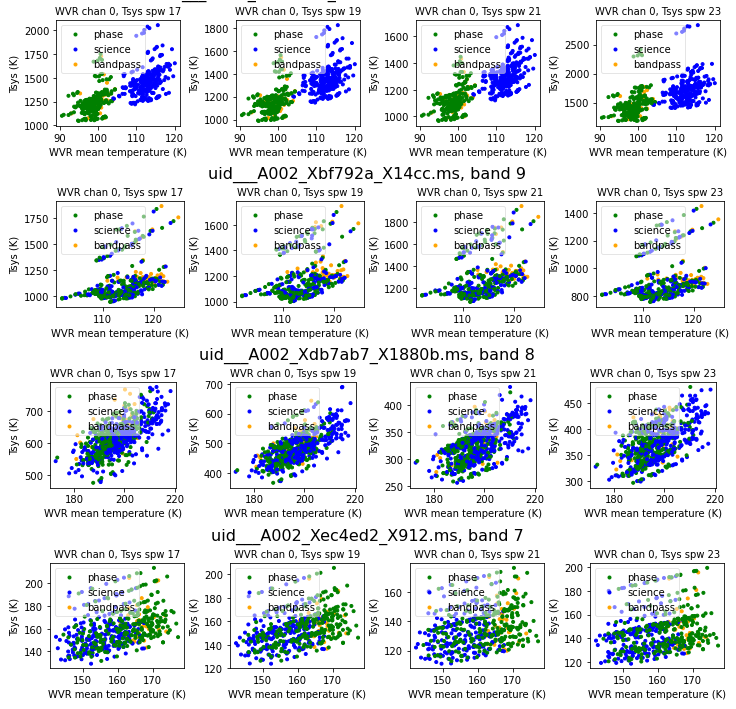

In [3]:
fig = plt.figure(figsize=(10,10),constrained_layout=True)
subfigs = fig.subfigures(4, 1)

for i, dir in enumerate(dirs):
    # read the file
    filename = dir+'/Tsys_WVR_matched_avgTime10.pkl'
    with open (filename, 'rb') as pickle_file:
        Tsys_table = pickle.load(pickle_file, encoding='latin')
    
    # load the data
    info = Tsys_table['info']
    vis = info['vis']
    Tsys_spws = info['Tsys spw']
    iants = Tsys_table['iant']
    obs_type = Tsys_table['obs_type']
    obs_type = obs_type.astype(str)
    scans = Tsys_table['scan']
    WVR = Tsys_table['WVR_means']
    Tsys = Tsys_table['Tsys']
    
    # exclude the bad data
    WVR[np.isin(iants, bad_ants[i]),:] = np.nan
    Tsys[np.isin(iants,bad_ants[i]),:] = np.nan
    
    WVR_sinchan = WVR[:,0]
    
    # start to plot
    j = int(i/1); k=i%1
    subfig = subfigs[i]
    subfig.suptitle(vis+', '+bands[i], fontsize=16)
    for i in range(4):
        Tsys_sinspw = Tsys[:,i]
        ax = subfig.add_subplot(1,4,i+1)
        
        # title
        title = 'WVR chan 0, Tsys spw '+str(Tsys_spws[i])+''
        plt.title(title, fontsize=10)

        # create color dictionary for the scatter plot
        color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
        # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
        legendhandle = [plt.plot([], marker=".", ls="", color=color)[0] for color in list(color_dict.values())]

        # plot the scatter plot
        sc = ax.scatter(WVR_sinchan, Tsys_sinspw, c=map_series_by_dict(obs_type, color_dict), marker='.')

        # label
        plt.xlabel('WVR mean temperature (K)')
        plt.ylabel('Tsys (K)')
        plt.legend(loc='upper left', framealpha=0.5)
        plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)
plt.savefig(picDir+'Tsys_WVR_summary_single.pdf', bbox_inches='tight',pad_inches=0.4)

Plot Tsys vs WVR for normalized values

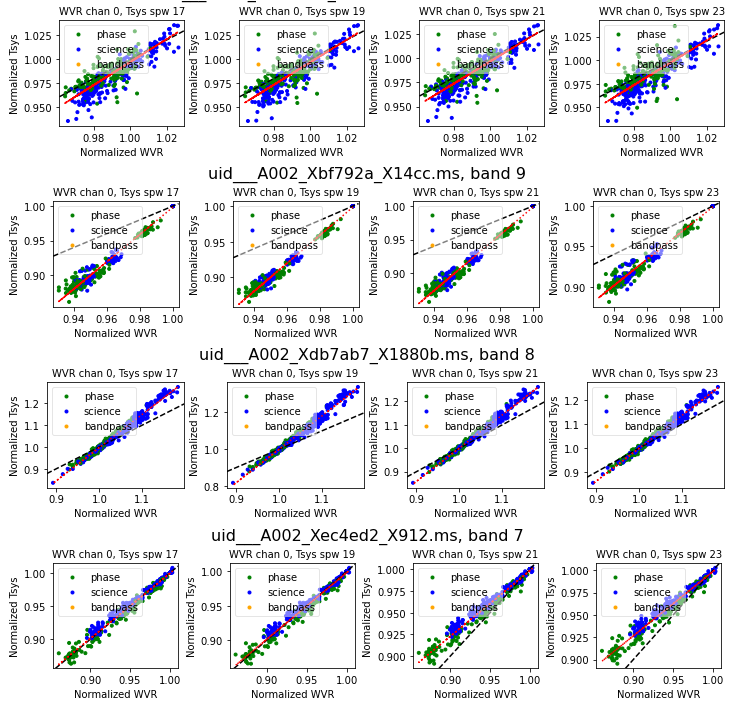

In [4]:
fig = plt.figure(figsize=(10,10),constrained_layout=True)
subfigs = fig.subfigures(4, 1)

for i, dir in enumerate(dirs[:4]):
    # read the file
    filename = dir+'/Tsys_WVR_matched_avgTime10.pkl'
    with open (filename, 'rb') as pickle_file:
        Tsys_table = pickle.load(pickle_file, encoding='latin')
    
    # load the data
    info = Tsys_table['info']
    vis = info['vis']
    Tsys_spws = info['Tsys spw']
    iants = Tsys_table['iant']
    obs_type = Tsys_table['obs_type']
    obs_type = obs_type.astype(str)
    scans = Tsys_table['scan']
    WVR = Tsys_table['WVR_means']
    Tsys = Tsys_table['Tsys']
    
    # exclude the bad data
    WVR[np.isin(iants, bad_ants[i]),:] = np.nan
    Tsys[np.isin(iants,bad_ants[i]),:] = np.nan
    Tsys[np.where(Tsys<10)] = np.nan
    
    WVR_sinchan = WVR[:,0]
    WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
    
    # start to plot
    j = int(i/1); k=i%1
    subfig = subfigs[i]
    subfig.suptitle(vis+', '+bands[i], fontsize=16)
    for i in range(4):
        Tsys_sinspw = Tsys[:,i]
        Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
        ax = subfig.add_subplot(1,4,i+1)
        
        # title
        title = 'WVR chan 0, Tsys spw '+str(Tsys_spws[i])+''
        plt.title(title, fontsize=10)

        # create color dictionary for the scatter plot
        color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
        # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
        legendhandle = [plt.plot([], marker=".", ls="", color=color)[0] for color in list(color_dict.values())]

        # plot the scatter plot
        sc = ax.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict), marker='.')
        
        # plot the 1-to-1 line
        lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
        upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
        ax.plot([lower, upper],[lower,upper],ls='--', color='black')
        
        # fit the linear relation between normalized Tsys and WVR
        xdata = WVR_norm; ydata = Tsys_norm
        idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
        fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
        fit_coeff = fit_results[0]
        fit_err = fit_results[1]
        fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
        ydata_fitted = fit_coeff[0] * xdata + fit_coeff[1]
        plt.plot(xdata, ydata_fitted, color='red', linestyle='dotted',
                label=str(round(fit_coeff[0], 4))+'*x+'+str(round(fit_coeff[1], 4))
                +'\n err: '+str(round(fit_err[0], 4)))

        # label
        plt.xlabel('Normalized WVR')
        plt.ylabel('Normalized Tsys')
        plt.legend(loc='upper left', framealpha=0.5)
        plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)
plt.savefig(picDir+'Tsys_WVR_norm_summary_single.pdf', bbox_inches='tight',pad_inches=0.4)

Plot the normalized Tsys versus WVR with partly fitted relation

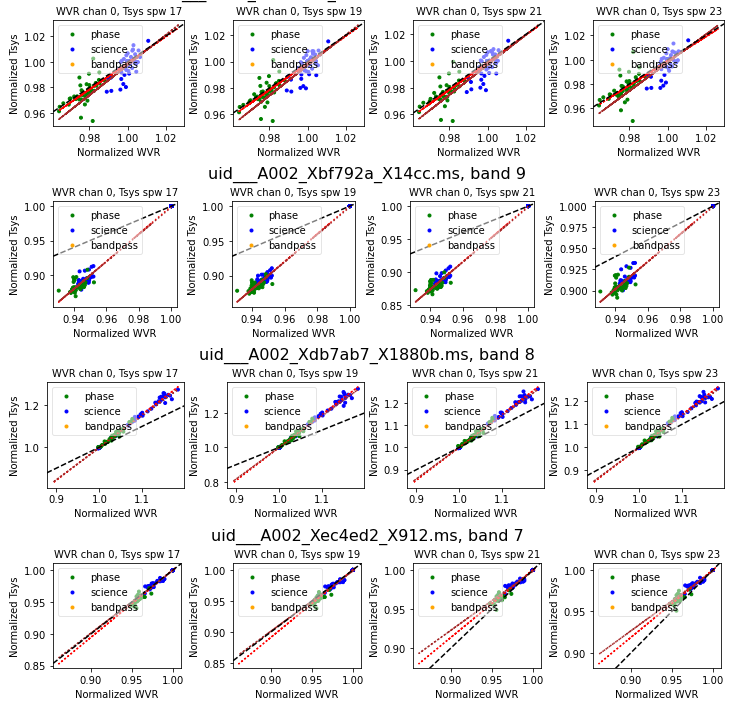

In [5]:
ATM_ids = [1,2,6,7]

fig = plt.figure(figsize=(10,10),constrained_layout=True)
subfigs = fig.subfigures(4, 1)

for i, dir in enumerate(dirs[:4]):
    # read the file
    filename = dir+'/Tsys_WVR_matched_avgTime10.pkl'
    with open (filename, 'rb') as pickle_file:
        Tsys_table = pickle.load(pickle_file, encoding='latin')
        
    # load the fitting results 
    fitfile = dir+'/Tsys_WVR_fitted_WVRchan0_normScans000.pkl'
    with open(fitfile,'rb') as pickle_file:
        fit_table = pickle.load(pickle_file, encoding='latin')
    
    # load the data
    info = Tsys_table['info']
    vis = info['vis']
    Tsys_spws = info['Tsys spw']
    iants = Tsys_table['iant']
    obs_type = Tsys_table['obs_type']
    obs_type = obs_type.astype(str)
    scans = Tsys_table['scan']
    WVR = Tsys_table['WVR_means']
    Tsys = Tsys_table['Tsys']
    
    # exclude the bad data
    WVR[np.isin(iants, bad_ants[i]),:] = np.nan
    Tsys[np.isin(iants,bad_ants[i]),:] = np.nan
    Tsys[np.where(Tsys<10)] = np.nan
    
    WVR_sinchan = WVR[:,0]
    WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
    WVR_norm_few = select_array(WVR_norm, iants, ATM_ids)
    
    # start to plot
    j = int(i/1); k=i%1
    subfig = subfigs[i]
    subfig.suptitle(vis+', '+bands[i], fontsize=16)
    for i in range(4):
        Tsys_sinspw = Tsys[:,i]
        Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
        Tsys_norm_few = select_array(Tsys_norm, iants, ATM_ids)
        obs_type_few = select_array(obs_type, iants, ATM_ids)
        ax = subfig.add_subplot(1,4,i+1)
        
        # title
        title = 'WVR chan 0, Tsys spw '+str(Tsys_spws[i])+''
        plt.title(title, fontsize=10)

        # create color dictionary for the scatter plot
        color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
        # color_dict["Mean relative error "+str(round(err_rel,4))] = 'black'
        legendhandle = [plt.plot([], marker=".", ls="", color=color)[0] for color in list(color_dict.values())]

        # plot the scatter plot
        sc = ax.scatter(WVR_norm_few, Tsys_norm_few, c=map_series_by_dict(obs_type_few, color_dict),marker='.')
        
        # fit the linear relation between normalized Tsys and WVR
        xdata = WVR_norm_few; ydata = Tsys_norm_few
        idx_nnan = ((~np.isnan(xdata)) & (~np.isnan(ydata)))
        fit_results = np.polyfit(xdata[idx_nnan], ydata[idx_nnan], 1, full=True)
        fit_coeff = fit_results[0]
        fit_err = fit_results[1]
        fit_err_rel = np.sqrt(fit_err / len(ydata[idx_nnan])) / np.mean(ydata[idx_nnan])
        Tsys_norm_fitted = fit_coeff[0] * WVR_norm + fit_coeff[1]
        plt.plot(WVR_norm, Tsys_norm_fitted, color='red', linestyle='dotted',
                label=str(round(fit_coeff[0], 4))+'*x+'+str(round(fit_coeff[1], 4))
                +'\n err: '+str(round(fit_err[0], 4)))
        
        # plot the original fitted results
        slope = fit_table[17+2*i]['coeff'][0]
        intercept = fit_table[17+2*i]['coeff'][1]
        Tsys_norm_fitted_orig = slope * WVR_norm + intercept
        plt.plot(WVR_norm, Tsys_norm_fitted_orig, color='brown', linestyle='dotted')
        

        # plot the 1-to-1 line
        lower=max(ax.set_xlim()[0], ax.set_ylim()[0])
        upper=min(ax.set_xlim()[1], ax.set_ylim()[1])
        ax.plot([lower, upper],[lower,upper],ls='--', color='black')        

        # label
        plt.xlabel('Normalized WVR')
        plt.ylabel('Normalized Tsys')
        plt.legend(loc='upper left', framealpha=0.5)
        plt.legend(legendhandle,list(color_dict.keys()), loc='upper left', framealpha=0.5)
plt.savefig(picDir+'Tsys_WVR_norm_part_summary_single.pdf', bbox_inches='tight',pad_inches=0.4)

### Make the summary figure for Tsys spw 17 with fitting and extrapolation figure

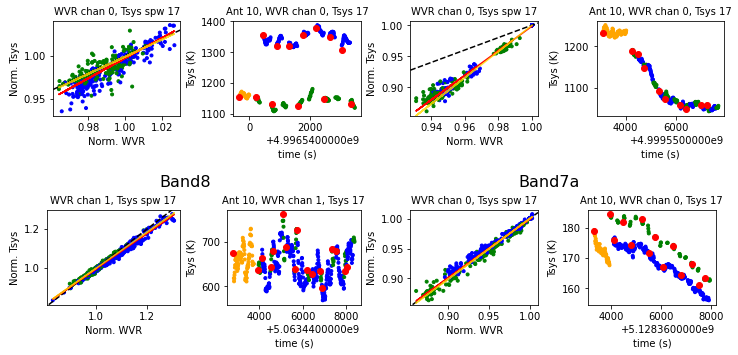

In [6]:
iant_id = 10
chans_WVR = [0,0,1,0]
Bands_label = ['Band10', 'Band9a', 'Band8', 'Band7a']

fig = plt.figure(figsize=(10,5), constrained_layout=True)
subfigs = fig.subfigures(2, 2, hspace=0.1)
for i, dir in enumerate(dirs): 
    # read the information of visibility file
    filename = dir+'/Tsys_WVR_matched_avgTime10.pkl'
    with open (filename, 'rb') as pickle_file:
        Tsys_table = pickle.load(pickle_file, encoding='latin')
    info = Tsys_table['info']
    vis = info['vis']
    vis = vis.replace('.asdm.sdm','')
    Tsys_spws = info['Tsys spw']
    # read the matched Tsys and WVR
    iants = Tsys_table['iant']
    obs_type = Tsys_table['obs_type']
    obs_type = obs_type.astype(str)
    scans = Tsys_table['scan']
    WVR = Tsys_table['WVR_means']
    Tsys = Tsys_table['Tsys']
    Tsys_time = Tsys_table['time_Tsys']
    # exclude the bad antennas
    WVR[np.isin(iants, bad_ants[i]),:] = np.nan
    Tsys[np.isin(iants,bad_ants[i]),:] = np.nan
    Tsys[np.where(Tsys<10)] = np.nan 
    # normalize Tsys and WVR
    Tsys_sinspw = Tsys[:,0]; WVR_sinchan = WVR[:,chans_WVR[i]]
    Tsys_norm = normalize_array(Tsys_sinspw, iants, obs_type, normScans=[0,0,0])
    WVR_norm = normalize_array(WVR_sinchan, iants, obs_type, normScans=[0,0,0])
    # read the extrapolated continuous Tsys
    filename_gain = dir+'/WVR_gaintable_chanWVR'+str(chans_WVR[i])+'_avgtime10.pkl'
    with open(filename_gain, 'rb') as pickle_file:
        WVR_table = pickle.load(pickle_file, encoding='latin')
    iants_WVR = WVR_table['iant']
    Tsys_ext = WVR_table['Tsys_ext']
    Tsys_orig = WVR_table['Tsys_orig']
    WVR_time = WVR_table['WVR_time']
    obsTypes_WVR = WVR_table['obs_type']
    obsTypes_WVR = obsTypes_WVR.astype('str')
    WVR_fields = WVR_table['field']
    ## extract the Tsys from a certain antenna
    Tsys_ext_sinant = Tsys_ext[np.where(iants_WVR==iant_id)]
    WVR_time_sinant = WVR_time[np.where(iants_WVR==iant_id)]
    obsTypes_WVR_sinant = obsTypes_WVR[np.where(iants_WVR==iant_id)]
    Tsys_orig_sinant = Tsys[np.where(iants==iant_id)]
    Tsys_time_sinant = Tsys_time[np.where(iants==iant_id)]
    # read the derived fitting relation
    fitfile = dir+'/Tsys_WVR_fitted_WVRchan'+str(chans_WVR[i])+'_normScans000.pkl'
    with open(fitfile,'rb') as pickle_file:
        fit_table = pickle.load(pickle_file, encoding='latin')
    fitfile = dir+'/Tsys_WVR_part_fitted_WVRchan'+str(chans_WVR[i])+'_normScans000.pkl'
    with open(fitfile,'rb') as pickle_file:
        fit_table2 = pickle.load(pickle_file, encoding='latin')
    
    # create the subfigure
    row = math.ceil((i+1)/2)-1; column=(i+1)%2-1
    subfig = subfigs[row, column]
    subfig.suptitle(Bands_label[i], fontsize=16)
    
    ### plot the fitting plot
    ax0 = subfig.add_subplot(1,2,1)
    # title and label
    title = 'WVR chan '+str(chans_WVR[i])+', Tsys spw '+str(Tsys_spws[0])+''
    ax0.set_title(title, fontsize=10)
    ax0.set_xlabel('Norm. WVR')
    ax0.set_ylabel('Norm. Tsys')
    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange'}
    legendhandle = [plt.plot([], marker=".", ls="", color=color)[0] for color in list(color_dict.values())]
    # plot the scatter plot
    sc = ax0.scatter(WVR_norm, Tsys_norm, c=map_series_by_dict(obs_type, color_dict),marker='.')
    # plot the 1-to-1 line
    lower=max(ax0.set_xlim()[0], ax0.set_ylim()[0])
    upper=min(ax0.set_xlim()[1], ax0.set_ylim()[1])
    ax0.plot([lower, upper],[lower,upper],ls='--', color='black')
    # plot the fitting line
    slope = fit_table[17]['coeff'][0]
    intercept = fit_table[17]['coeff'][1]
    Tsys_norm_fitted_orig = slope * WVR_norm + intercept
    plt.plot(WVR_norm, Tsys_norm_fitted_orig, color='red', linestyle='solid')
    slope = fit_table2[17]['coeff'][0]
    intercept = fit_table2[17]['coeff'][1]
    Tsys_norm_fitted_orig2 = slope * WVR_norm + intercept
    plt.plot(WVR_norm, Tsys_norm_fitted_orig2, color='gold', linestyle='solid', alpha=0.8)
    
    ### plot the extrapolation plot
    ax1 = subfig.add_subplot(1,2,2)
    # set the title and label
    ax1.set_title('Ant '+str(iant_id)+', WVR chan '+str(chans_WVR[i])+', Tsys '+str(Tsys_spws[0]), fontsize=10)
    # add the label
    ax1.set_ylabel('Tsys (K)')
    ax1.set_xlabel('time (s)')
    ax1.xaxis.set_label_coords(.5, -0.35)
    # create color dictionary for the scatter plot
    color_dict = { 'phase':'green', 'science':'blue', 'bandpass':'orange', 'Tsys':'red'}
    legendhandle = [plt.plot([], marker=".", ls="", color=color)[0] for color in list(color_dict.values())]
    # make the scatter plot
    sc = ax1.scatter(WVR_time_sinant, Tsys_ext_sinant[:,0], c=map_series_by_dict(obsTypes_WVR_sinant, color_dict),
                    marker='.')
    ax1.scatter(Tsys_time_sinant, Tsys_orig_sinant[:,0], color='red')
    
plt.savefig(picDir+'Tsys_WVR_spw17_ant10_single.pdf', bbox_inches='tight',pad_inches=0.4)